In [1]:
import timeit
import numpy as np
import pandas as pd
from scipy import stats
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm_notebook
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
plt.style.use('seaborn-whitegrid')
scaler = MinMaxScaler()

__author__ = 'HK Dambanemuya'
__version__ = 'Python 3'


Bad key "text.kerning_factor" on line 4 in
/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# import bid data
df_map = {'bids_1': pd.read_csv("../../Data/lending/aggregated/bids_1.csv").fillna(-1),
        'bids_2': pd.read_csv("../../Data/lending/aggregated/bids_2.csv").fillna(-1),
        'bids_3': pd.read_csv("../../Data/lending/aggregated/bids_3.csv").fillna(-1),
        'bids_4': pd.read_csv("../../Data/lending/aggregated/bids_4.csv").fillna(-1),
        'bids_5': pd.read_csv("../../Data/lending/aggregated/bids_5.csv").fillna(-1),
        'bids_6': pd.read_csv("../../Data/lending/aggregated/bids_6.csv").fillna(-1),
        'bids_7': pd.read_csv("../../Data/lending/aggregated/bids_7.csv").fillna(-1),
        'bids_8': pd.read_csv("../../Data/lending/aggregated/bids_8.csv").fillna(-1),
        'bids_9': pd.read_csv("../../Data/lending/aggregated/bids_9.csv").fillna(-1),
        'bids_10': pd.read_csv("../../Data/lending/aggregated/bids_10.csv").fillna(-1)}
# variable labels
label_map = {'Diversity': 'Opinion diversity',
             'Momentum': 'Aggregation speed',
             'CreditGrade': 'Credit rating',
             'DebtToIncomeRatio': 'Debt-to-income ratio',
             'Description' : 'Description length'}
# variable colors
color_map = {'Diversity': '#559D3E',
             'Momentum': '#663300',
             'CreditGrade': '#3A78AE',
             'DebtToIncomeRatio': '#7F1E85',
             'Description' : '#DF7C2D'}
# range of bids
x = range(1,11)

In [3]:
# results map
results = {'Diversity': [[],[]],
           'Momentum': [[],[]],
           'CreditGrade': [[],[]],
           'DebtToIncomeRatio': [[],[]],
           'Description': [[],[]]
           }

# iterate through dataframes
for k, v in tqdm_notebook(df_map.items()):
    v = v.dropna() # drop null values
    X = v[v.columns[1:-1]] # select independent variables
    X = scaler.fit_transform(X) # scale variables from 0 to 1 
    y = v[v.columns[-1]] # select outcome variable
    # split data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)
    # instantiate random forest classifier
    clf = RandomForestClassifier(random_state=42)
    # fit training data to random forest model
    model = clf.fit(X_train, y_train)
    # compute permutation importances on validation set
    r = permutation_importance(model, X_val, y_val,
                               n_repeats=10,
                               random_state=42)
    # store permutation importance means and standard deviations
    for i in r.importances_mean.argsort()[::-1]:
        results[v.columns[i+1]][0].append(r.importances_mean[i])
        results[v.columns[i+1]][1].append(r.importances_std[i])


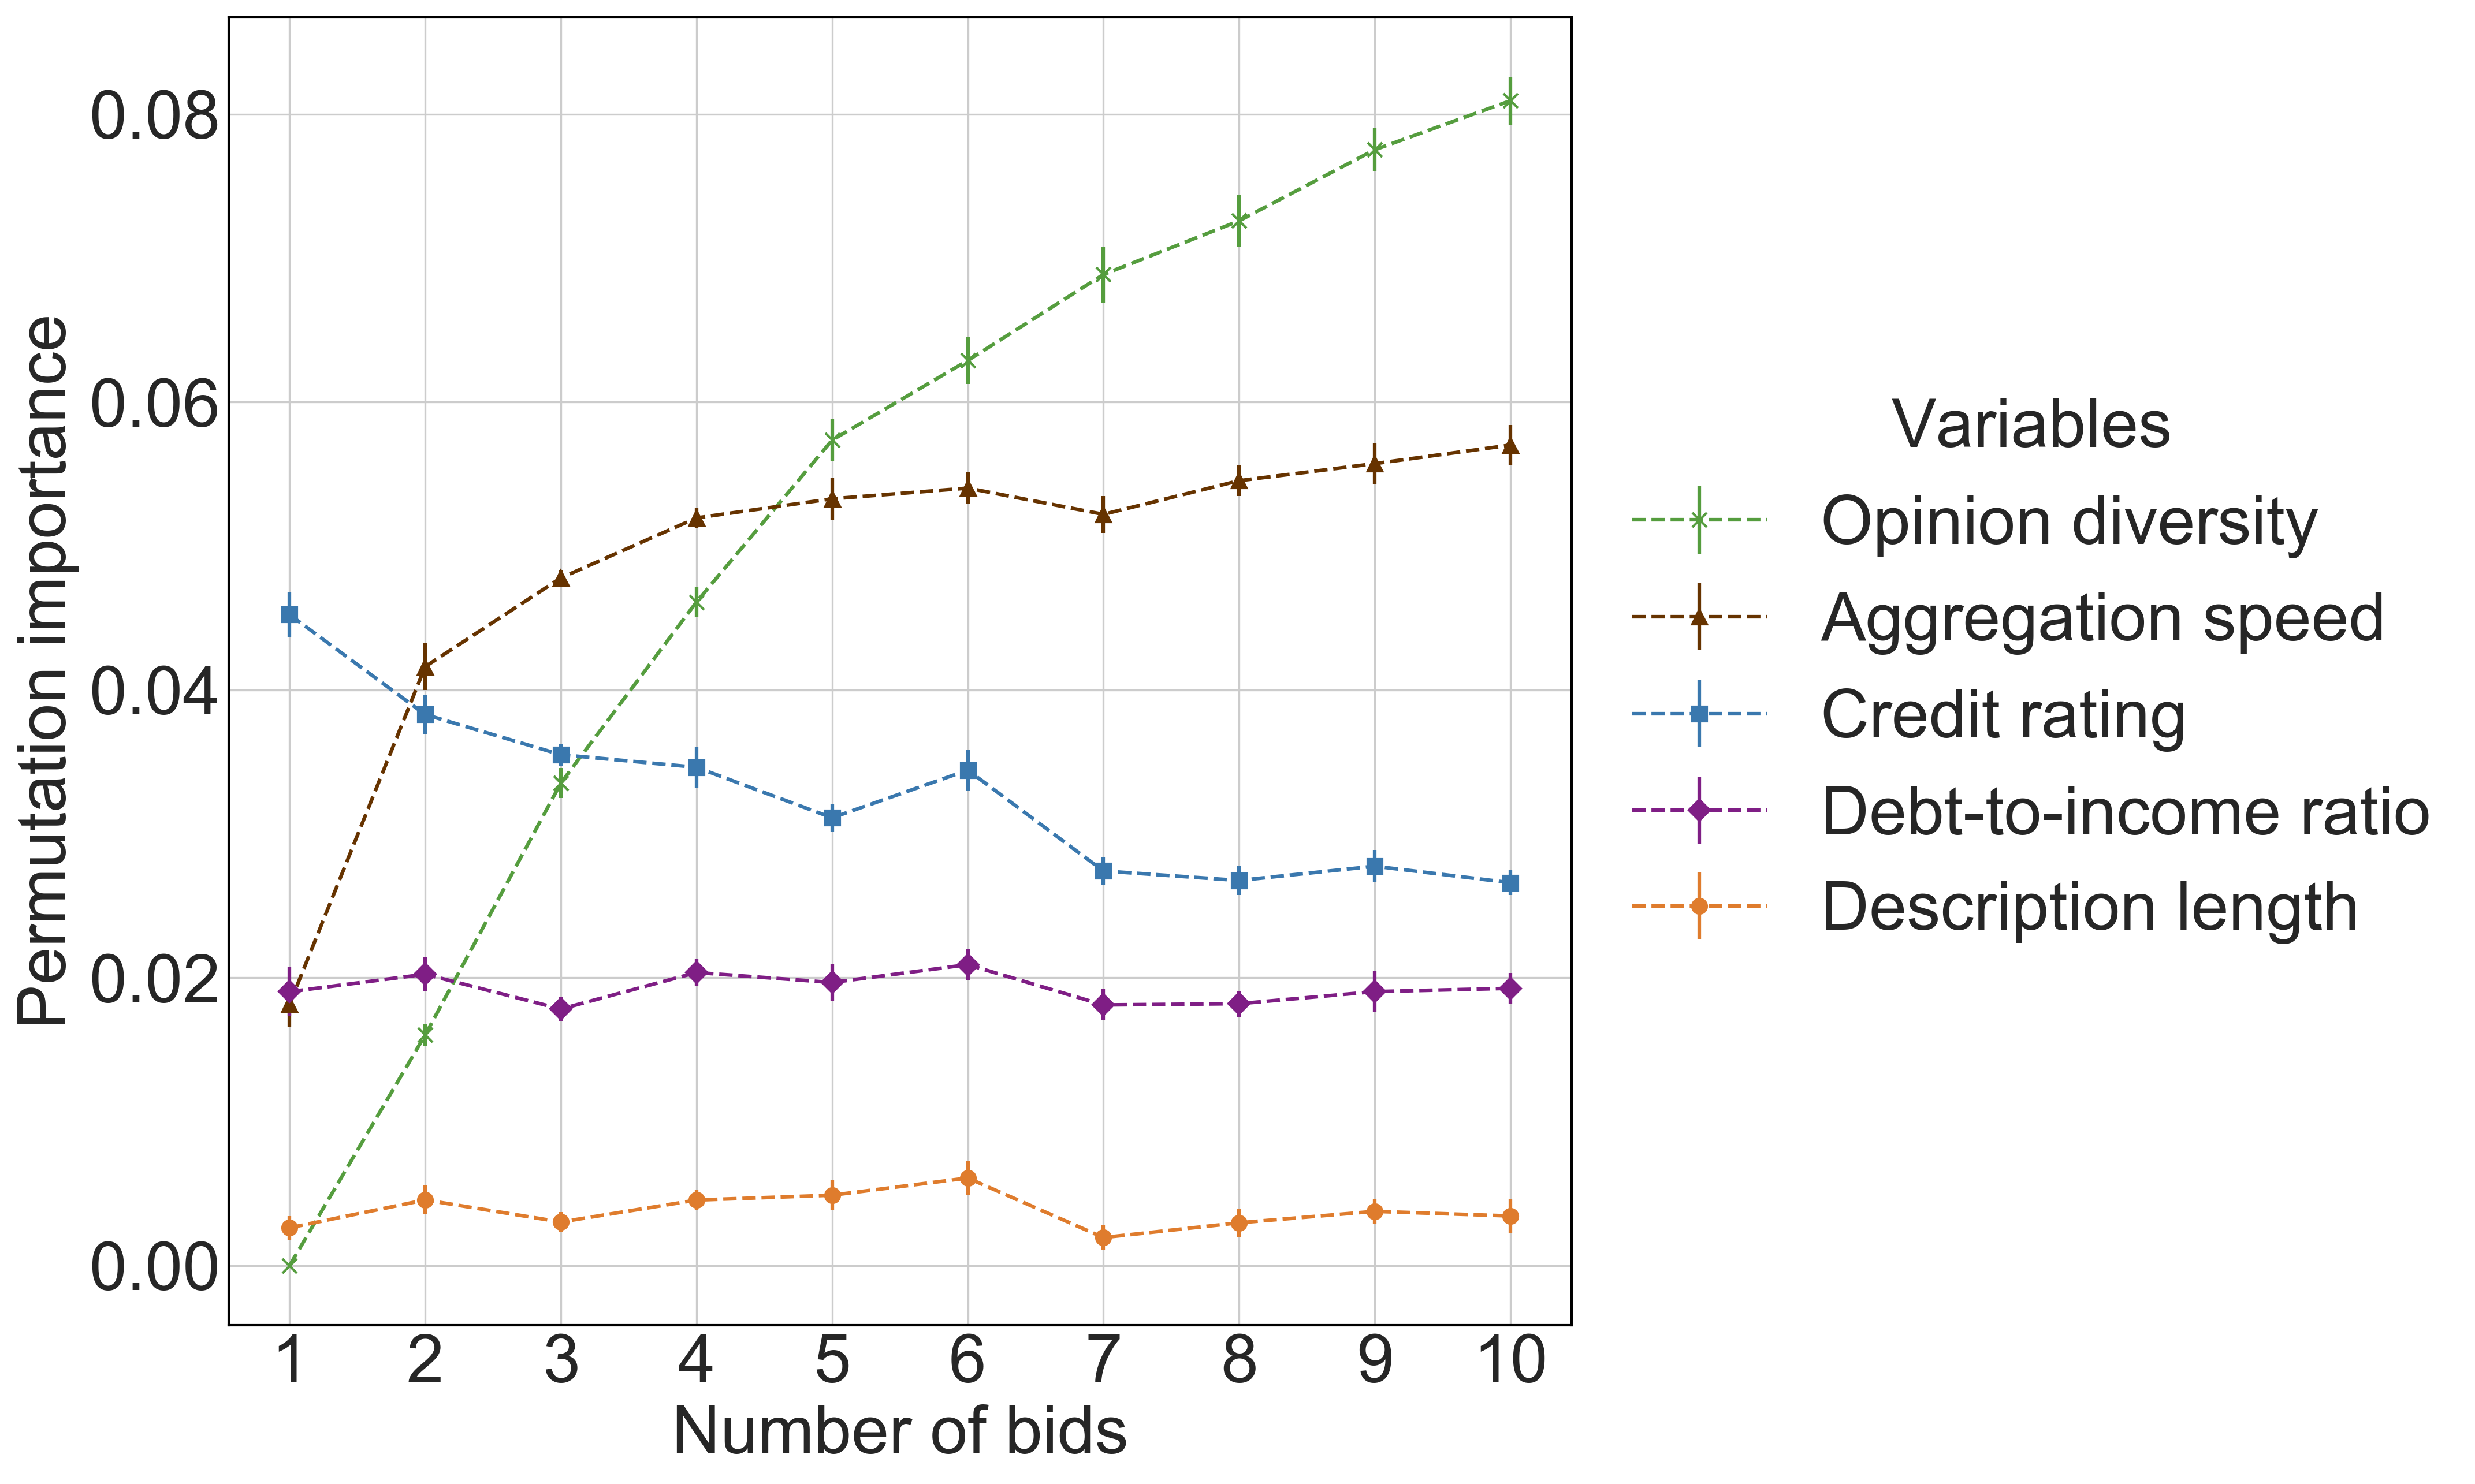

In [15]:
figure, ax = plt.subplots(figsize=(10, 10), dpi=300)
s=28
# iterate through variables
i = 0
markers = ['x', '^', 's', 'D', 'o']
for variable, values in results.items():
    # plot error bars
    plt.errorbar(x, values[0], yerr=values[1],
                 linestyle='--', marker=markers[i], color=color_map[variable], label=label_map[variable])
    i+=1
# customize plot
plt.xticks(x, fontsize=s)
plt.yticks(fontsize=s)
plt.ylabel("Permutation importance", fontsize=s)
plt.xlabel("Number of bids", fontsize=s)
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Variables', fontsize=s)
plt.setp(legend.get_title(),fontsize=s)
for spine in ['top', 'right', 'bottom', 'left']:
    ax.spines[spine].set_visible(True)
    ax.spines[spine].set_color('black')
plt.show()

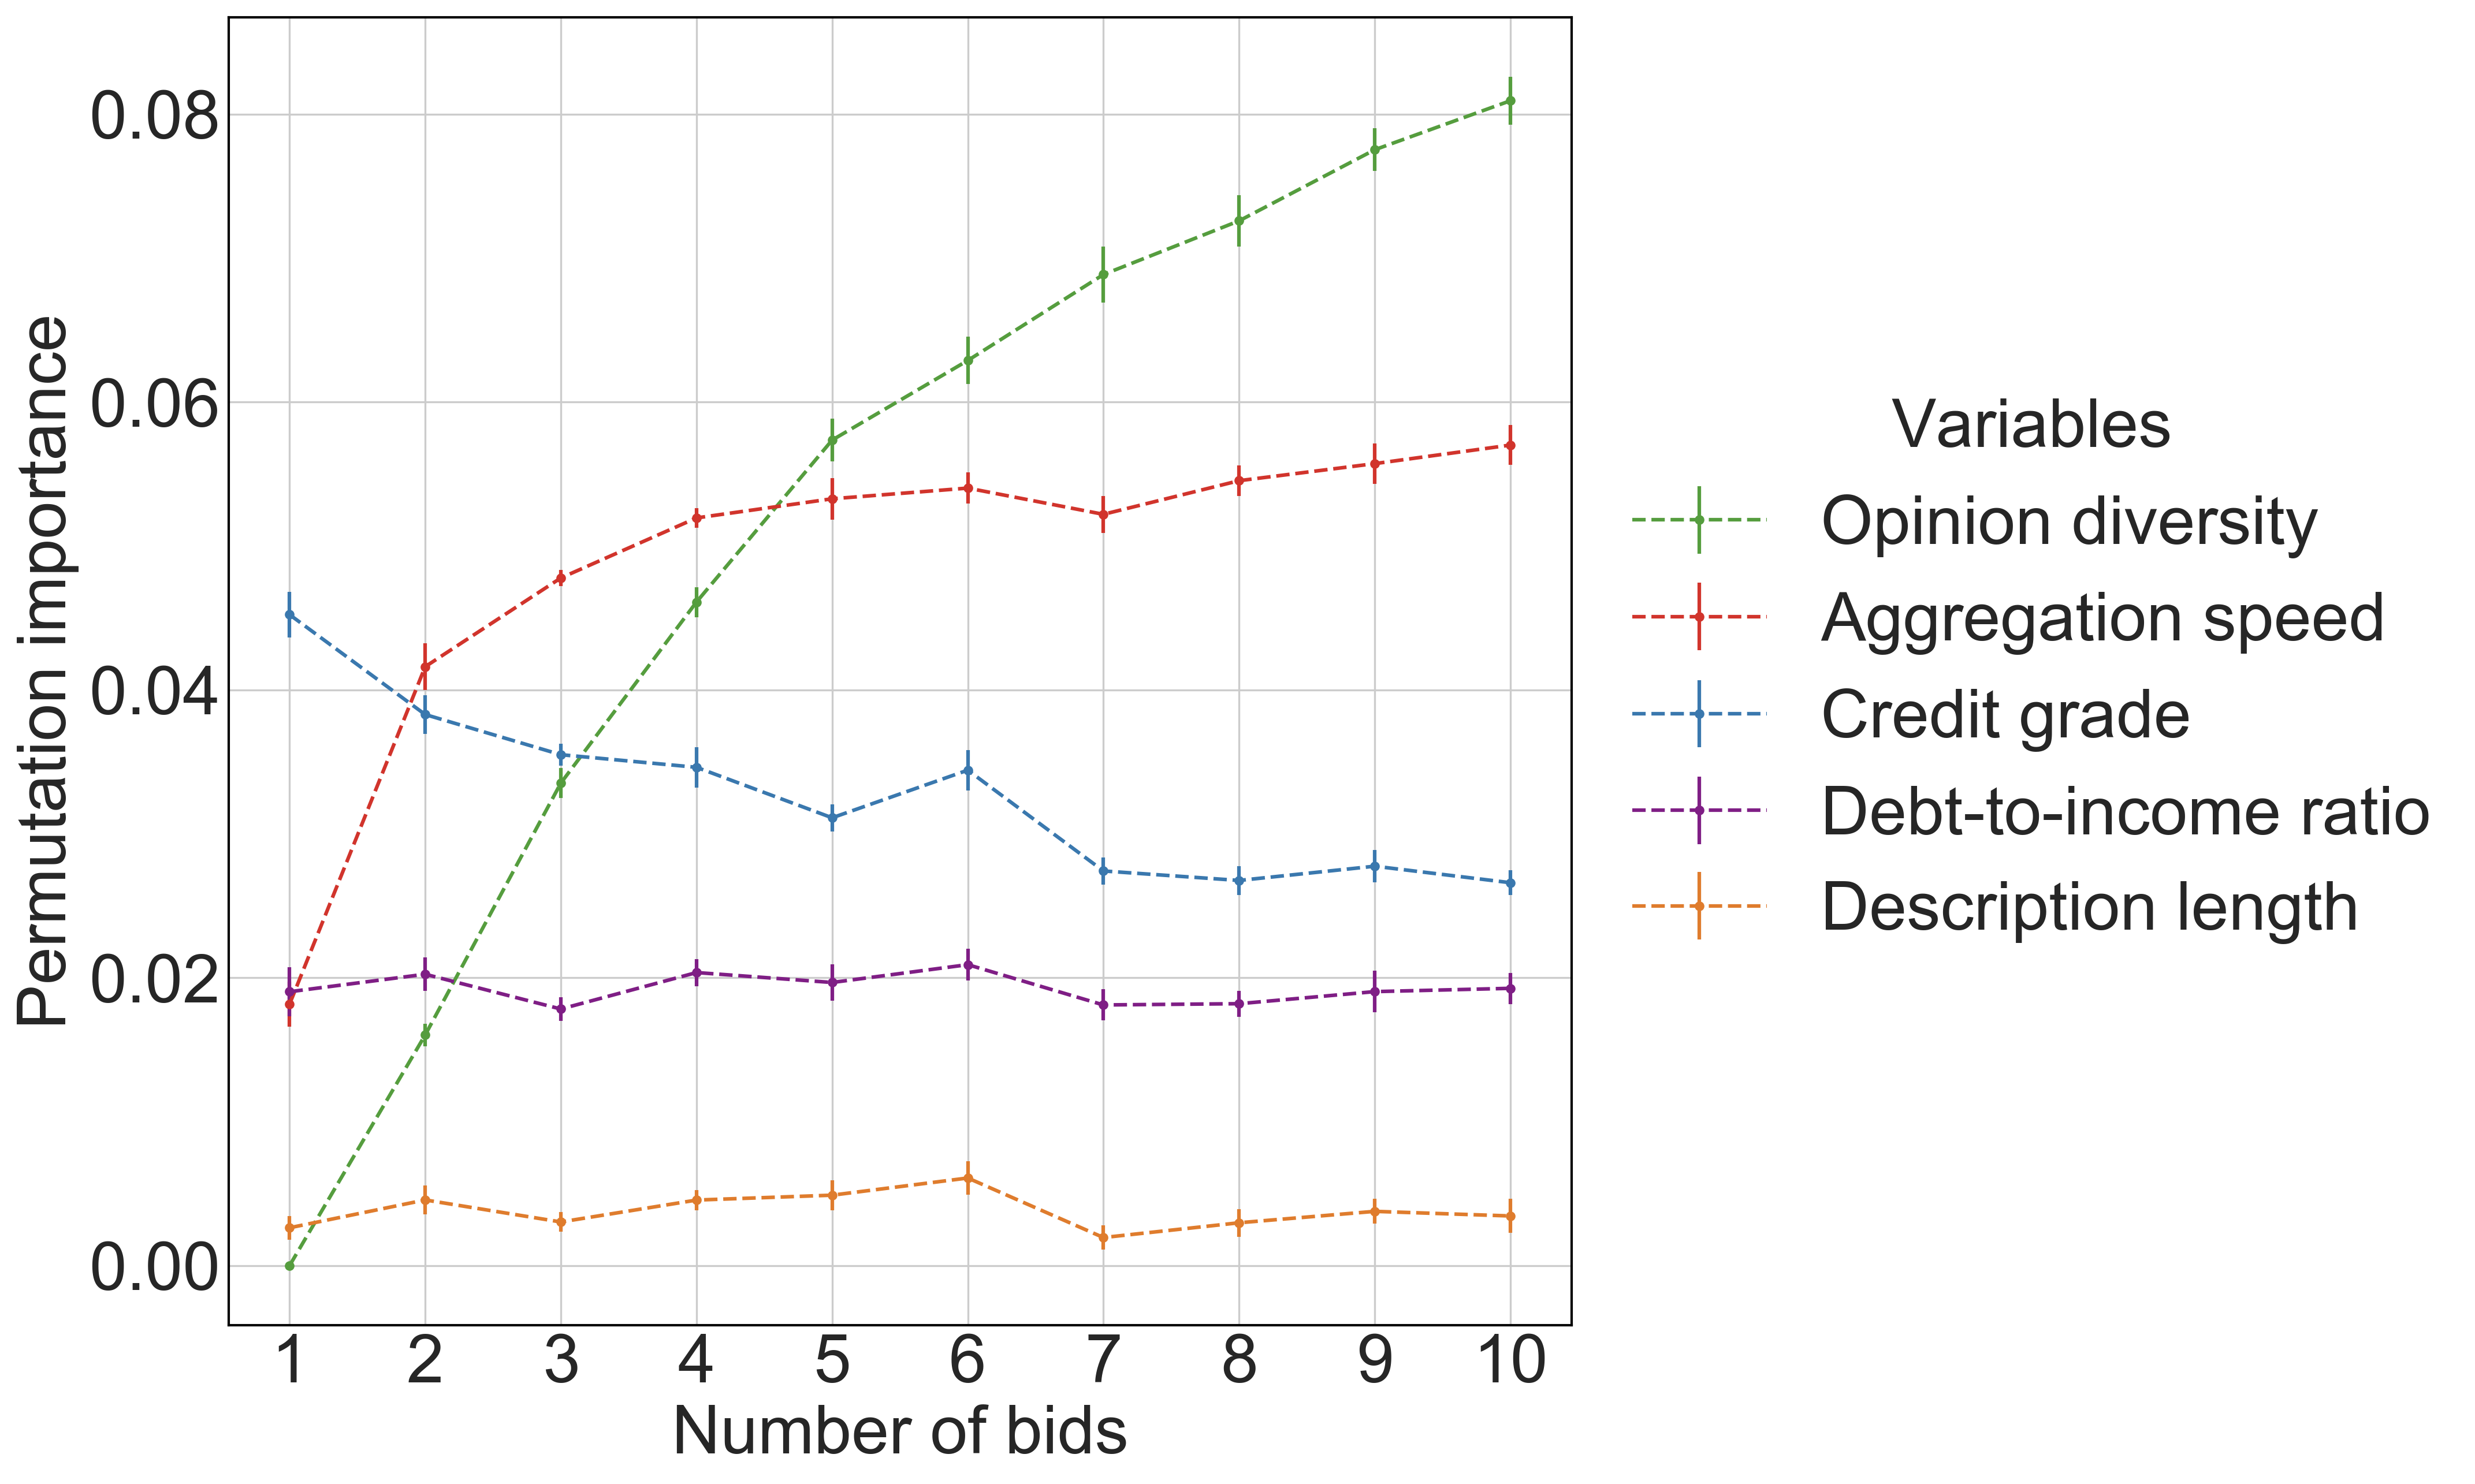

In [4]:
figure, ax = plt.subplots(figsize=(10, 10), dpi=300)
s=28
# iterate through variables
for variable, values in results.items():
    # plot error bars
    plt.errorbar(x, values[0], yerr=values[1],
                 linestyle='--', marker='.', color=color_map[variable], label=label_map[variable])
# customize plot
plt.xticks(x, fontsize=s)
plt.yticks(fontsize=s)
plt.ylabel("Permutation importance", fontsize=s)
plt.xlabel("Number of bids", fontsize=s)
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Variables', fontsize=s)
plt.setp(legend.get_title(),fontsize=s)
for spine in ['top', 'right', 'bottom', 'left']:
    ax.spines[spine].set_visible(True)
    ax.spines[spine].set_color('black')
plt.show()